# Pré-processamento com TreeTagger

In [1]:
import nbimporter
import numpy as np
import re
import Convert_NRC as nrc
from header import EmotionAnalysis as ea

Importing Jupyter notebook from Convert_NRC.ipynb
Importing Jupyter notebook from /home/ellen/Projetos/TextMining/header/EmotionAnalysis.ipynb


## Obtenção do documento

In [2]:
filepath = 'books/senhora.txt'

In [3]:
raw = ea.open_file(filepath)

## Pré-processamento

In [4]:
tags = ea.tags(raw)

In [5]:
label = re.compile('^A|^R|^NC.P|^NCF|^V')

In [6]:
stopwords = ea.get_stopwords()

In [7]:
tokens = []
for tag in tags:
    if bool(re.search(label, tag[1])) == False or tag[2] == '<unknown>':
        tokens.append(tag[0].lower())
    else:
        tokens.append(tag[2])

In [8]:
negated_tokens = ea.negations(tokens)

In [9]:
no_stop_tokens = ea.remove_stopwords(stopwords, negated_tokens)

In [10]:
filtered_tokens = ea.remove_not_alpha(no_stop_tokens)

In [11]:
text = ea.convert_to_text(tokens)

### Análise do texto

In [12]:
dist = ea.tokens_frequency(filtered_tokens)

In [13]:
ea.info(tokens, filtered_tokens)

quantidade de palavras: 94484
quantidade de palavras após o filtro: 40987
quantidade de palavras únicas: 6811
quantidade de palavras únicas após o filtro: 6171
diversidade léxica: 15.055993363749481


In [13]:
freq = ea.most_frequent(filtered_tokens, dist, 20)
print(f"20 palavras mais frequentes: {freq}")

20 palavras mais frequentes: [('ser', 869), ('aurélia', 622), ('ter', 520), ('moço', 356), ('ir', 306), ('estar', 298), ('fazer', 283), ('haver', 263), ('seixas', 246), ('senhor', 243), ('marido', 220), ('seixa', 211), ('dizer', 209), ('mulher', 187), ('dar', 183), ('poder', 173), ('ainda', 168), ('vez', 152), ('casa', 149), ('ver', 146)]


In [14]:
filtered_tokens

['haver',
 'ano',
 'raiar',
 'céu',
 'fluminense',
 'novo',
 'estrela',
 'desde',
 'momento',
 'ascensão',
 'ninguém',
 'disputar',
 'cetro',
 'ir',
 'proclamar',
 'rainha',
 'salão',
 'tornar',
 'deus',
 'baile',
 'musa',
 'poeta',
 'ídolo',
 'noivo',
 'disponibilidade',
 'ser',
 'rico',
 'formoso',
 'duas',
 'opulência',
 'realçar',
 'flor',
 'vaso',
 'alabastro',
 'dois',
 'esplendor',
 'refletir',
 'raio',
 'sol',
 'prisma',
 'diamante',
 'recordar',
 'aurélia',
 'camargo',
 'atravessar',
 'firmamento',
 'corte',
 'brilhante',
 'meteoro',
 'apagar',
 'repente',
 'meio',
 'deslumbramento',
 'produzir',
 'ter',
 'dezoito',
 'ano',
 'aparecer',
 'primeiro',
 'vez',
 'sociedade',
 'conhecer',
 'logo',
 'buscar',
 'todos',
 'avidez',
 'informação',
 'acerca',
 'grande',
 'novidade',
 'dia',
 'dizer',
 'muita',
 'coisa',
 'agora',
 'pois',
 'tempo',
 'saber',
 'verdade',
 'comento',
 'malévolo',
 'usar',
 'noveleiro',
 'aurélia',
 'ser',
 'órfão',
 'ter',
 'companhia',
 'velho',
 'parent

### Análise de Emoção

In [12]:
wordList, emotionList = ea.emolex()

In [42]:
Counter(emoList['positivo'])

Counter({'céu': 20,
         'estrela': 14,
         'deus': 32,
         'ídolo': 5,
         'noivo': 47,
         'realçar': 4,
         'flor': 55,
         'alabastro': 2,
         'esplendor': 9,
         'diamante': 2,
         'brilhante': 20,
         'conhecer': 52,
         'informação': 7,
         'verdade': 34,
         'mãe': 72,
         'emancipação': 2,
         'guardar': 30,
         'deferência': 1,
         'firme': 6,
         'governar': 2,
         'ação': 6,
         'tutor': 24,
         'maior': 49,
         'influência': 12,
         'geral': 12,
         'adoração': 10,
         'prêmio': 2,
         'vitória': 3,
         'sagacidade': 3,
         'admirável': 2,
         'cheio': 19,
         'beleza': 43,
         'verdadeiro': 22,
         'sim': 18,
         'harmonia': 2,
         'riso': 11,
         'inefável': 7,
         'ternura': 12,
         'perfeição': 1,
         'amor': 122,
         'esplêndido': 11,
         'bem': 95,
         'possuir'

In [13]:
emoList = ea.newList(emotionList, filtered_tokens)

In [14]:
emotionCounts = ea.generate_count_with_negation(wordList, filtered_tokens)

In [15]:
emotionCounts.most_common()

[('positivo', 5886),
 ('negativo', 3536),
 ('confiança', 3363),
 ('antecipação', 2923),
 ('alegria', 2322),
 ('medo', 1954),
 ('tristeza', 1907),
 ('raiva', 1419),
 ('surpresa', 1202),
 ('nojo', 1095)]

In [45]:
wordCounts = generate_count(emoList, filtered_tokens)

In [46]:
wordCounts

{'positivo': Counter({'céu': 20,
          'estrela': 14,
          'deus': 32,
          'ídolo': 5,
          'noivo': 47,
          'realçar': 4,
          'flor': 55,
          'alabastro': 2,
          'esplendor': 9,
          'diamante': 2,
          'brilhante': 20,
          'conhecer': 52,
          'informação': 7,
          'verdade': 34,
          'mãe': 72,
          'emancipação': 2,
          'guardar': 30,
          'deferência': 1,
          'firme': 6,
          'governar': 2,
          'ação': 6,
          'tutor': 24,
          'maior': 49,
          'influência': 12,
          'geral': 12,
          'adoração': 10,
          'prêmio': 2,
          'vitória': 3,
          'sagacidade': 3,
          'admirável': 2,
          'cheio': 19,
          'beleza': 43,
          'verdadeiro': 22,
          'sim': 18,
          'harmonia': 2,
          'riso': 11,
          'inefável': 7,
          'ternura': 12,
          'perfeição': 1,
          'amor': 122,
          'es

In [21]:
wordArray = np.asarray(wordCounts.most_common(5))
wordArray = [i[0] for i in wordArray]

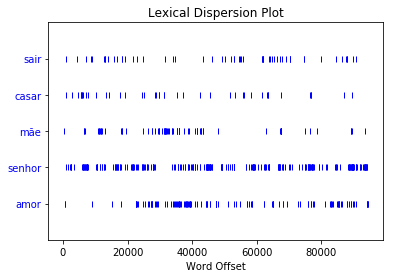

In [24]:
text.dispersion_plot(wordArray)

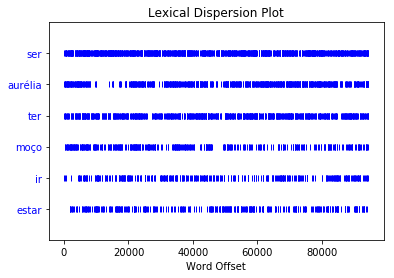

In [23]:
sortedToken = sorted(list(set(filtered_tokens)), key=lambda token: dist[token], reverse=True)
text.dispersion_plot(sortedToken[:6])

In [84]:
import nltk
import pandas as pd
from collections import OrderedDict, defaultdict, Counter

In [30]:
sents = nltk.sent_tokenize(raw.lower())

In [47]:
sent_list = [ea.tokenize(s) for s in sents]

In [80]:
l = []
for sent in sent_list:
    l.append(generate_count(wordList, sent))  

In [79]:
def generate_count(word_list, tokens):
    emoCount = Counter()
    for t in tokens:
        if len(word_list[t]) > 0:
            emoCount += Counter(word_list[t])
    return emoCount

In [85]:
pd.Series(generate_count(wordList, sent_list[0]))

positivo       2
antecipação    1
alegria        1
confiança      1
dtype: int64

In [156]:
d = {}
for sent in sent_list:
    index = sent_list.index(sent)
    count = generate_count(wordList, sent)
    if bool(count):
        d[index] = pd.Series(count)

In [157]:
df = pd.DataFrame(d)

In [158]:
df.fillna(0)

,0,4,5,8,9,10,11,12,13,14,...,4710,4711,4713,4714,4716,4718,4719,4721,4724,4725
alegria,1.0,2.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,3.0,...,1.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0
antecipação,1.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0,2.0,...,2.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,4.0
confiança,1.0,1.0,1.0,1.0,0.0,1.0,3.0,1.0,2.0,3.0,...,0.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0
medo,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
nojo,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
raiva,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
surpresa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
tristeza,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0


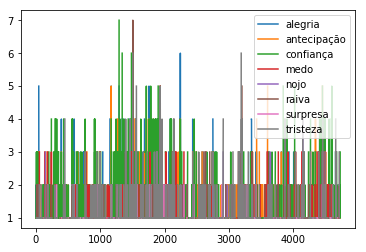

In [159]:
df.T.plot()

In [129]:
def batches(tokens, n):
    for i in range(0, len(tokens), n):
        yield tokens[i:i+n]

In [132]:
new_list = list(batches(filtered_tokens, 500))

In [153]:
dic = {}
for n in new_list:
    index = new_list.index(n)
    count = generate_count(wordList, n)
    dic[index] = pd.Series(count)

In [154]:
df2 = pd.DataFrame(dic)

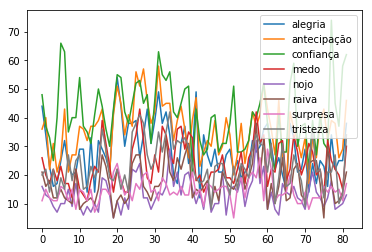

In [155]:
df2.T.plot()

In [49]:
import csv
def emolex():
    wordList = defaultdict(list)
    emotionList = defaultdict(list)
    sentList = defaultdict(list)
    
    with open('lexico/emolex_pt.csv', 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            if int(row['present']) == 1:
                emotionList[row['emotion']].append(row['word'])
                if row['emotion'] == 'positivo' or row['emotion'] == 'negativo':
                    sentList[row['word']].append(row['emotion'])
                else:
                    wordList[row['word']].append(row['emotion'])
    
    return wordList, emotionList, sentList

In [50]:
wordList, emotionList, sentList = emolex()

In [52]:
sentList

defaultdict(list,
            {'abismal': ['negativo'],
             'abismo': ['negativo'],
             'abjeta': ['negativo'],
             'abjeto': ['negativo'],
             'abolição': ['negativo'],
             'abolir': ['negativo'],
             'abominação': ['negativo'],
             'abominar': ['negativo'],
             'abominável': ['negativo'],
             'aborrecer': ['negativo'],
             'aborrecido': ['negativo'],
             'aborrecimento': ['negativo'],
             'abortar': ['negativo'],
             'abortivo': ['negativo'],
             'aborto': ['negativo'],
             'aborto espontâneo': ['negativo'],
             'abraço': ['positivo'],
             'abranger': ['positivo'],
             'abrasão': ['negativo'],
             'abrigo': ['positivo'],
             'abscesso': ['negativo'],
             'absentismo': ['negativo'],
             'absoluto': ['positivo'],
             'absolvição': ['positivo'],
             'absorver': ['negativo'],